# Graph Matching

You work at Facebook and Twitter, but there’s been a terrible incident. All twitter users’ names and handles have been somehow been deleted! Your bosses are furious and have tasked you with somehow recovering the lost information. How might you go about doing this? Luckily, you’ve been working hard and have somehow earned yourself this dual Facebook/Twitter gig, so you have a great resource at your disposal: the Facebook social network. You know all facebook users and who they are friends with, and since you’ve only lost the twitter usernames, you can still figure out which ghost-users follow each other (make this sentence more specific, split it up into more sentences). You decide to use the Facebook network connectivity data to re-label the twitter social network. Alternatively, you can say the we are “aligning” Twitter based on Facebook. 

In the example above, the social networks are represented with each user as a node, and an edge exists if two users are friends. We'll define the facebook and twitter networks as $F$ and $T$ respectively, with associated adjacency matrices $A_F$ and $A_T$. This method is known as $\textit{Graph Matching}$, because we are matching the node labels of one graph to another. This can also be thought of as a mapping; that is, based on the neighborhood structure of a node in the $F$ network, we assign the same label to the node in $T$ with the most similar structure. In other words, one of our twitter users will be assigned the user name of the Facebook user with the most followers in common. This is then done for the whole network, such that overall the structure is best preserved.

As you can imagine, there are a very large number of these possible mappings. In fact, for network pairs with $n$ nodes, there are $n!$ possible mappings. So how would we go about solving this(more specific) mathematically? First, we need a metric that tells us how similar two networks are to each other. For graph matching, this similarity metric is defined as $f(A, B) = ||A - B||_F^2$ for unweighted adjacency matrices $A, B \in \mathbb{R}^{n \times n}$. In other words, $f(A, B)$ is the sum of the squared elementwise differences between $A$ and $B$. To understand this functionally, consider the best possible case where $A=B$, that is, the networks are identical. The difference will be a matrix of all zeros, and taking the squared norm will then yield $f(A,B) = 0$. If we remove one edge from $A$, then $f(A,B) = 1$. If we consider the worst possible case (every edge in $A$ does not exist in $B$, and vice versa), then $f(A,B) = n^2$. This metric effectively counts the number of adjacnecy disagreements between $A$ and $B$. Thus, we want to find the mapping where $f(A, B)$ is as small as possible.


## Graph Matching Small Networks

Say we have the network pairs below, $T$ and $F$. They are four nodes each, $\{1, 2, 3, 4\}$ for $T$, and $\{a, b, c, d\}$ for $F$. The two networks are clearly equal to each other. 

![gm_11](gm_1.png)

However, the spatial layout of a network's nodes is arbirary, and in reality it can often be much harder to tell whether two networks are the same. For instance, we can swap the spatial location of nodes $c$ and $d$ in network $F$, as shown below. Even with such a small network, it's hard to tell whether the networks are the same. Nonetheless, by looking at the adjacency matrices, we see that the networks are in fact the same, with $f(A_T, A_F) = 0$

![gm_22](gm_2.png)
<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & c & d \end{array}
\\
\begin{array}{ccc}
a \\
b \\
c \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\]
    </div>

Next, we swap the actual the node labels of nodes 2 and 3 in network $F$. 

![gm_33](gm_3.png)
<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad 
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & c & d \end{array}
\\
\begin{array}{ccc}
a \\
b \\
c \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\end{array}
\right)\end{array}
\]
    </div>
    
As we see the networks are no longer the same, with $f(A_T,A_F) = 8$. This might seem a bit high, but note that due to the graph being undirected, adjecency disagreements are effectively counted twice, since all edges (in and out) appear twice in the adjacency matrix. After showing how networks with a low number of edge disagreements are considered to be better matches, we will now demonstrate how to manipulate our networks and adjacency matrices such that we can find alignments that match well.

## Permutation Matrices

Mappings are represented via $\textit{Permutation Matrices}$ when solving the graph matching problem. A permutation matrix is a matrix of all ones and zeros, where each row and column adds up to one. In other words, each row and column has exactly one entry equal to one, with the rest being zeros.


### $PB$ moves the rows, $BP^T$ moves the columns
Permutation matrices are commonly used as a method to move around the rows and columns of a square matrix. Consider the following example:

<AxesSubplot:title={'center':'Row Permutation $BP^T$:'}>

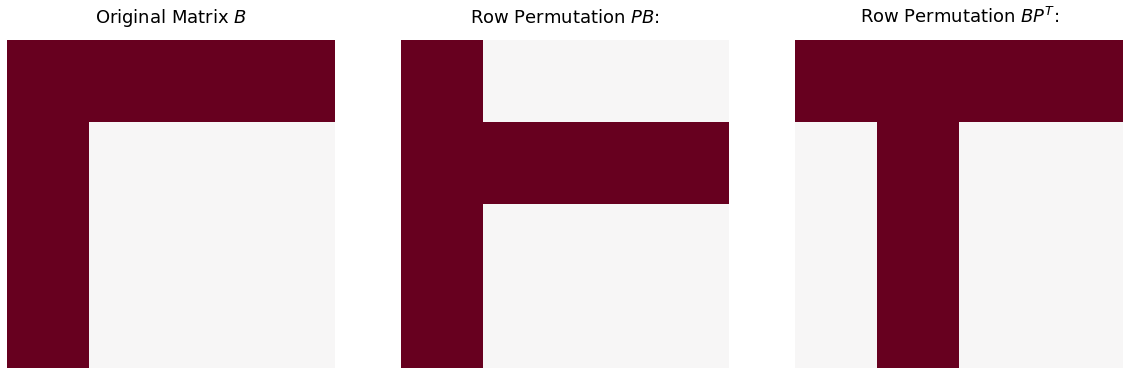

In [1]:
import numpy as np
from graspologic.plot import heatmap
import matplotlib.pyplot as plt

B = np.array([[1,1,1,1],
              [1,0,0,0],
              [1,0,0,0],
              [1,0,0,0]])

P = np.array([[0,1,0,0],
              [1,0,0,0],
              [0,0,1,0],
              [0,0,0,1]])

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
heatmap(B, ax=axs[0], cbar=False, title = r'Original Matrix $B$')
heatmap(P@B, ax=axs[1], cbar=False, title = r'Row Permutation $PB$:')
heatmap(B@P.T, ax=axs[2], cbar=False, title = r'Row Permutation $BP^T$:')

The permutation matrix represents the following mapping:  
$0 \rightarrow 1$  
$1 \rightarrow 0$  
$2 \rightarrow 2$   
$3 \rightarrow 3$  
The matrix multiplication $PB$ moves the rows based on the mapping, and $BP^T$ moves the columns based on the mapping. In other words, in this case $PB$ swaps rows 0 and 1 of $B$, and $BP^T$ swaps columns 0 and 1 of $B$. Therefore by combined these two operations $PBP^T$, we can move both the rows and columns based on a single bijection.


### Permutation Matrices to Match Graphs
Next, we again consider the previous simple network pair example of swapping the node labels of 2 and 3 in network H:
![gm_3](gm_3.png)

<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad 
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & c & d \end{array}
\\
\begin{array}{ccc}
a \\
b \\
c \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\end{array}
\right)\end{array}
\]
    </div>

This swap is represented by the following bijection to recover the node correspondence between $G$ and $H$  
$0 \rightarrow 0$  
$1 \rightarrow 1$  
$2 \rightarrow 3$   
$3 \rightarrow 2$  


<AxesSubplot:title={'center':'$A_F$ with row and column permutation'}>

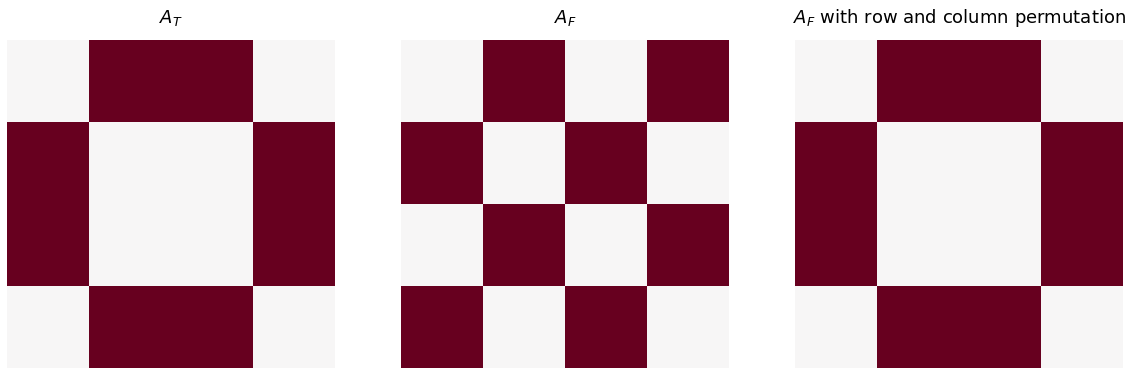

In [2]:
A = np.array([[0,1,1,0],
              [1,0,0,1],
              [1,0,0,1],
              [0,1,1,0]])
B = np.array([[0,1,0,1],
              [1,0,1,0],
              [0,1,0,1],
              [1,0,1,0]])

P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]])

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
heatmap(A, ax=axs[0], cbar=False, title = r'$A_T$')
heatmap(B, ax=axs[1], cbar=False, title = r'$A_F$')
heatmap(P@B@P.T, ax=axs[2], cbar=False, title = r'$A_F$ with row and column permutation')


As shown in the code block above, using the permutation matrix we are able to recover the correspondence between $T$ and $F$.  
Thus, the graph matching formulation for any two adjacency matrices $A, B$, seeks to minimize $|| A - PBP^\intercal||_F^2$ such that $P$ is a permuation matrix. This means that you shuffle the rows and columns of $B$, such that it is as close as possible to $A$. In mathematics, the process of minimizing (or maximizing) a function based on some constraint is known as optimization.

## Finding an Good Permutation with Gradient Descent

The algorithm used for solving graph matching is a variation of gradient descent.  The specifics of the algorithm are beyond the scope of this book, but for now you can simply imagine it as gradient descent. A gradient can be thought of as a vector valued slope; it is simply the slope of a function in all of it's dimensions, at a single point in space. Gradient Descent is a very common optimization method using to find optimal solutions for a wide range of problems. 

A simple way to think of the method is gravity.  Consider an inspector who might use a golf ball to find the lowest point when installing a drain. The ball rolls down hill until it comes to a stop; once stopped, we know we've found the lowest point. Gradient descent works in a similar way, taking steps in the direction of the local gradient with respect to some parameter. Once the gradient is zero, the minimum has been found.

The main steps of a gradient descent method are choosing a suitable initial position (can be chosen randomly), then gradually improving the cost function one step at a time, until the function is changing by a very small amount, converging to a minimum. The main issue with gradient descent is that it does not guarantee that you will find a global minimum, only that you will find the local minimum of your initial position.

![grad_desc](grad_desc.png)

The image above is a simplification in two dimensions; the network functions we optimize over are n dimensional when matching networks with n nodes, making the problem incredibly difficult to solve. For this reason (among others outside of the scope), the state-of-the-art graph matching algorithm is an approximation algorithm.


## Graph Matching with graspologic

For the example below, we will match two networks with a known to be have a node bijection that preserves a common network structure. To do this, we simulate a single Erdos-Reyni network, $A$, with six nodes and edge probability of 30. Then, we generate $B$ by randomly permuting the node labels of $A$. Thus, $A$ and $B$ are said to be $\textit{isomorphic}$.

Number of adjecnecy disagreements:  16.0


<AxesSubplot:title={'center':'B [A Randomly Shuffled]'}>

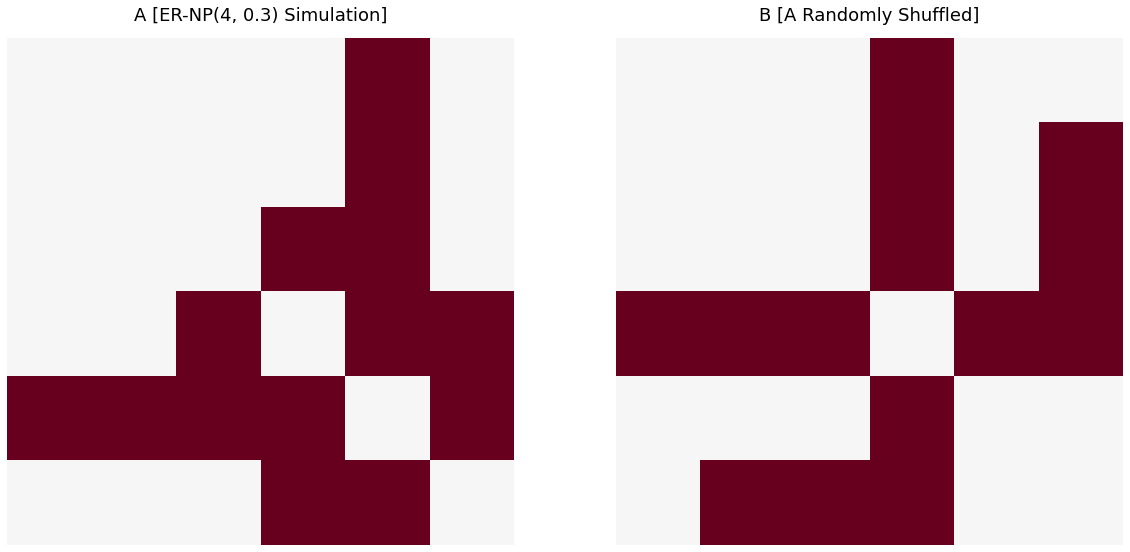

In [3]:
from graspologic.simulations import er_np

n = 6
p = 0.5

# np.random.seed(1)
A = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)
B = A[np.ix_(node_shuffle_input, node_shuffle_input)]
print("Number of adjecnecy disagreements: ", np.sum(abs(A-B)))

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
heatmap(A, ax=axs[0], cbar=False, title = 'A [ER-NP(4, 0.3) Simulation]')
heatmap(B, ax=axs[1], cbar=False, title = 'B [A Randomly Shuffled]')

Below, we create a model to solve the Graph Matching Problem. The model is then fitted for the two graphs A and B.

Number of adjecnecy disagreements:  0.0


<AxesSubplot:title={'center':'A-B [Unshuffled]'}>

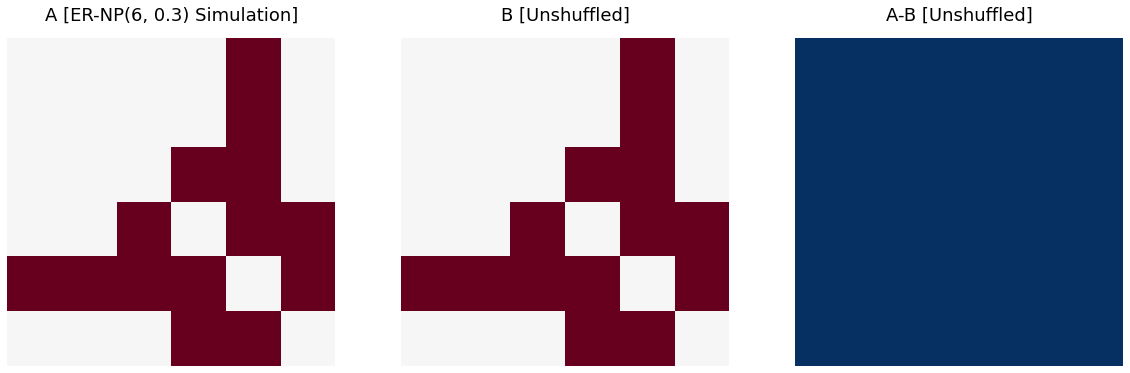

In [4]:
from graspologic.match import GraphMatch

gmp = GraphMatch()
gmp = gmp.fit(A,B)
B = B[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]
print("Number of adjecnecy disagreements: ", np.sum(abs(A-B)))

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
heatmap(A, ax=axs[0], cbar=False, title = 'A [ER-NP(6, 0.3) Simulation]')
heatmap(B, ax=axs[1], cbar=False, title = 'B [Unshuffled]')
heatmap((A-B), ax=axs[2], cbar=False, title = 'A-B [Unshuffled]')

The graph matching algorithm is able to successfully unshuffle $B$, with zero adjacency disagreements between $A$ and the matched $B$.

## Seeds

As mentioned previously, as network become larger, they quickly become more difficult to match. One method to mitigate this difficulty is to use $\textit{seeds}$. Seeds are a subset of matches that we already know before we perform the graph matching. For example, if we are given two graphs $T$ and $F$ with 300 nodes each, we might already know ten node matches between $T$ and $F$. Having this prior information greatly improves our ability to match the networks. 

## Seeded Graph Matching on Correlated Graph Pairs
To demonstrate the effectiveness of Seeded Graph Matching (SGM), the algorithm will be applied on a pair of correlated SBM graphs (undirected, no self loops) $T, F \sim SBM\,(n, p, rho)$  with the following parameters:
\begin{align*}
n &= [100, 100, 100]\\
p &= \begin{bmatrix} 
0.7 & 0.3 & 0.4\\
0.3 & 0.7 & 0.3\\
0.4 & 0.3 & 0.7
\end{bmatrix}\\
rho &= 0.9
\end{align*}

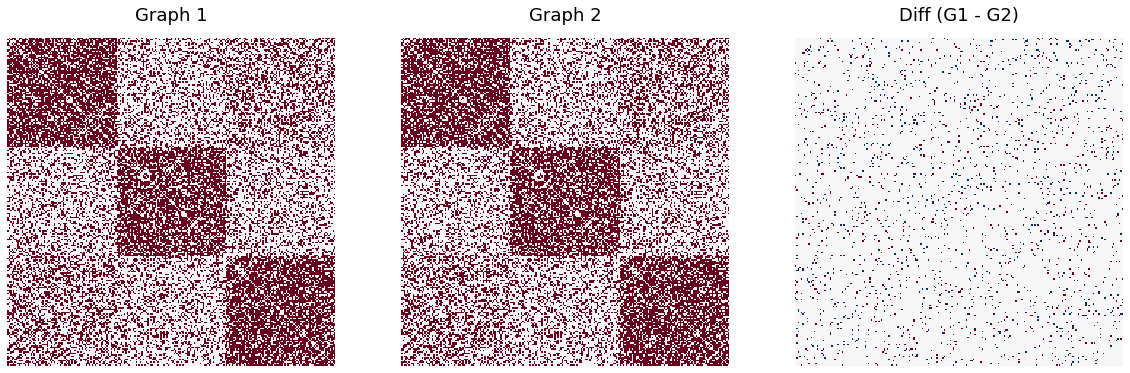

In [5]:
import seaborn as sns
from graspologic.simulations import er_corr, sbm, sbm_corr
directed = False
loops = False
n_per_block = 75
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.9
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2, ax=axs[1], cbar=False, title="Graph 2")
_ = heatmap(A1 - A2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")

To emphasize the effectiveness of SGM, as well as why having seeds is important, we will randomly shuffle the vertices of Graph 2. This random permutation is stored, and unshuffled, such that we have available the optimal permutation that returns the original graph 2. 

Here we see that after shuffling graph 2, there are many more edge disagreements, as expected.

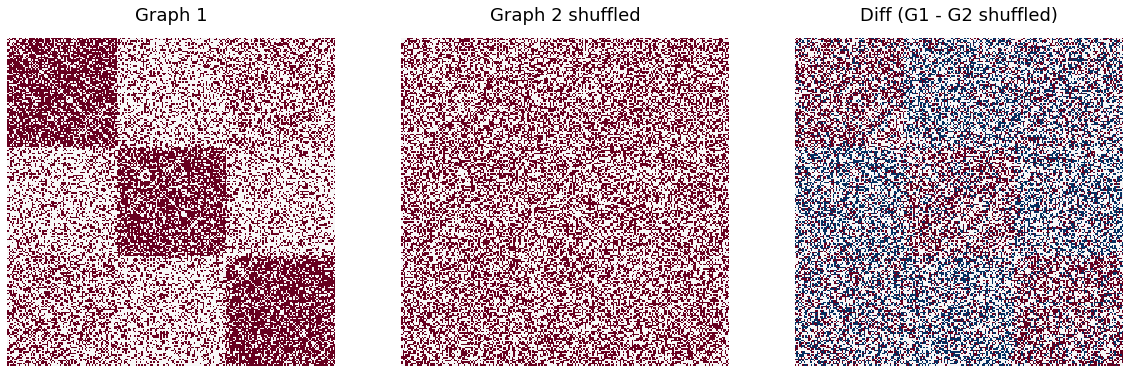

In [6]:
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_shuffle, ax=axs[1], cbar=False, title="Graph 2 shuffled")
_ = heatmap(A1 - A2_shuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 shuffled)")

## Unshuffling graph 2 without seeds
First, we will run SGM on graph 1 and the shuffled graph 2 with no seeds, and return the match ratio, that is the fraction of vertices that have been correctly matched.

Match Ratio with no seeds:  0.022222222222222254


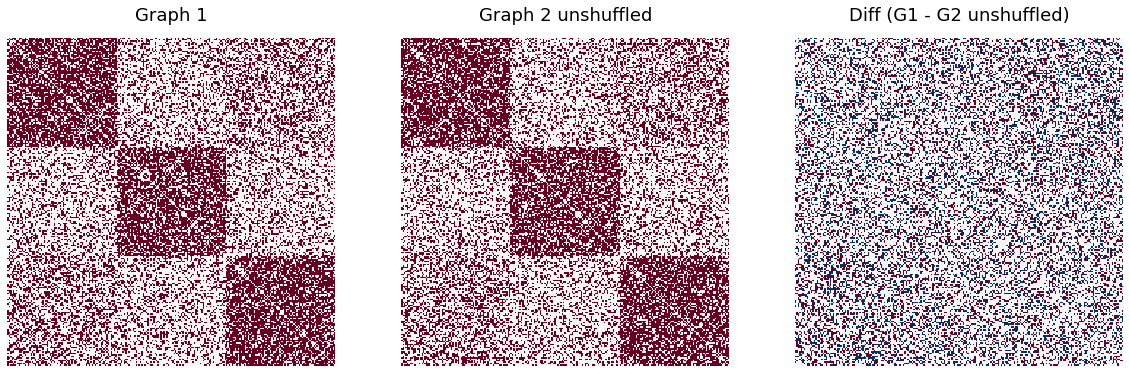

In [7]:
sgm = GraphMatch()
sgm = sgm.fit(A1,A2_shuffle)
A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_unshuffle, ax=axs[1], cbar=False, title="Graph 2 unshuffled")
heatmap(A1 - A2_unshuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 unshuffled)")

match_ratio = 1-(np.count_nonzero(abs(sgm.perm_inds_-node_unshuffle_input))/n_verts)
print("Match Ratio with no seeds: ", match_ratio)

While the predicted permutation for graph 2 did recover the basic structure of the stochastic block model (i.e. graph 1 and graph 2 look qualitatively similar), we see that the number of edge disagreements between them is still quite high, and the match ratio quite low. 

## Unshuffling graph 2 with 10 seeds
Next, we will run SGM with 10 seeds randomly selected from the optimal permutation vector found ealier. Although 10 seeds is only about 4% of the 300 node graph, we will observe below how much more accurate the matching will be compared to having no seeds.

Match Ratio with 10 seeds:  1.0


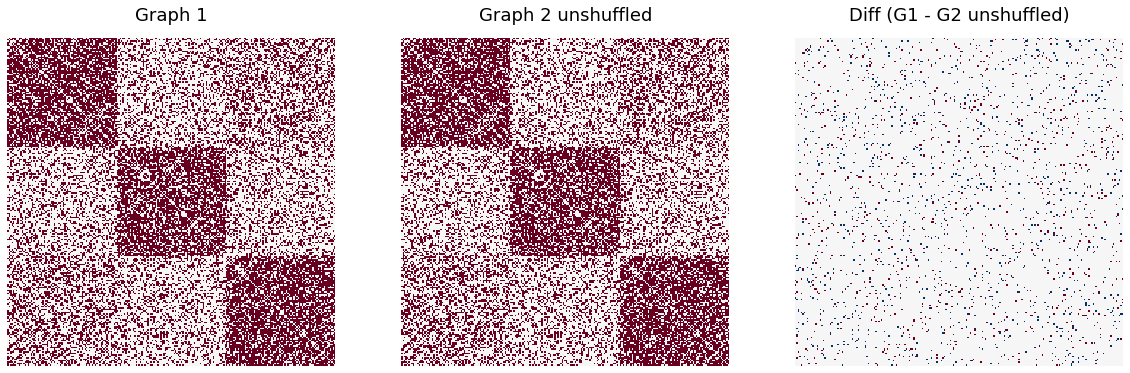

In [8]:
W1 = np.sort(np.random.permutation(len(A1)-1)[:10])
W2 = np.array(node_unshuffle_input[W1])
    
sgm = GraphMatch()
sgm = sgm.fit(A1,A2_shuffle,W1,W2)
A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
heatmap(A1, ax=axs[0], cbar=False, title="Graph 1")
heatmap(A2_unshuffle, ax=axs[1], cbar=False, title="Graph 2 unshuffled")
heatmap(A1 - A2_unshuffle, ax=axs[2], cbar=False, title="Diff (G1 - G2 unshuffled)")

match_ratio = 1-(np.count_nonzero(abs(sgm.perm_inds_-node_unshuffle_input))/n_verts)
print("Match Ratio with 10 seeds: ", match_ratio)

From the results above, we see that when running SGM on the same two graphs, with no seeds there is match ratio is quite low. However including 10 seeds increases the match ratio to 100% (meaning that the shuffled graph 2 was completely correctly unshuffled).